## Business Case:-Predicting Customer Response to Telemarketing                                              Campaigns(Term Deposits)

#### Nowadays, marketing spending in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

#### The Main Objective  is to increase the effectiveness of the bank's telemarketing campaign ,There is a single binary output variable ( “Yes” or “No”) revealing the outcomes of the phone calls.

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Loading the data
df1=pd.read_csv('bank-full.csv') ## Main Data set
df2=pd.read_csv('bank.csv') ## Sample Data set

In [3]:
print(df1.shape)
## Display's the no of rows and coulmns
print(df2.shape)

(45211, 17)
(4521, 17)


######  There are 45,211 observations in this dataset. Each represents an existing customer that the bank reached via phone calls.
######  For each observation, the dataset records 16 input variables that stand for both qualitative and quantitative attributes of the customer.

In [4]:
## Display's the top 5 rows of the main Dataset
df1.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df2.head(5)
## Displays the top 5 rows of sample Dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
## Display the bottom 2 rows of main data set
df1.tail(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
## Display the bottom 2 rows of Sample Data set
df2.tail(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [8]:
## Getting all columns from the Main dataset 
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
## Getting all columns from the Sample dataset
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df1.describe()
## Describeing the Data set 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df1.describe(include=['O'])
## describe the dataset wich are having string datatype

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [12]:
df1.info()
## basic information of the main Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
## Basic information of Sample dataset 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [14]:
df1.isnull().sum()
## No Null values are present

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
df2.isnull().sum()
## No Null values are in there in Sample dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Exploratory Data Analysis

In [25]:
import sweetviz as sv
my_report = sv.analyze(df1)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='age', ylabel='Density'>

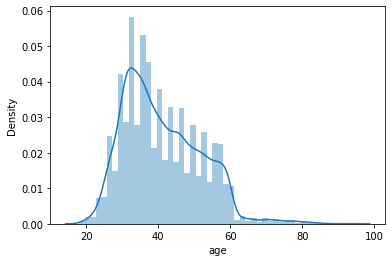

In [5]:
sns.distplot(df1.age.dropna(axis=0))

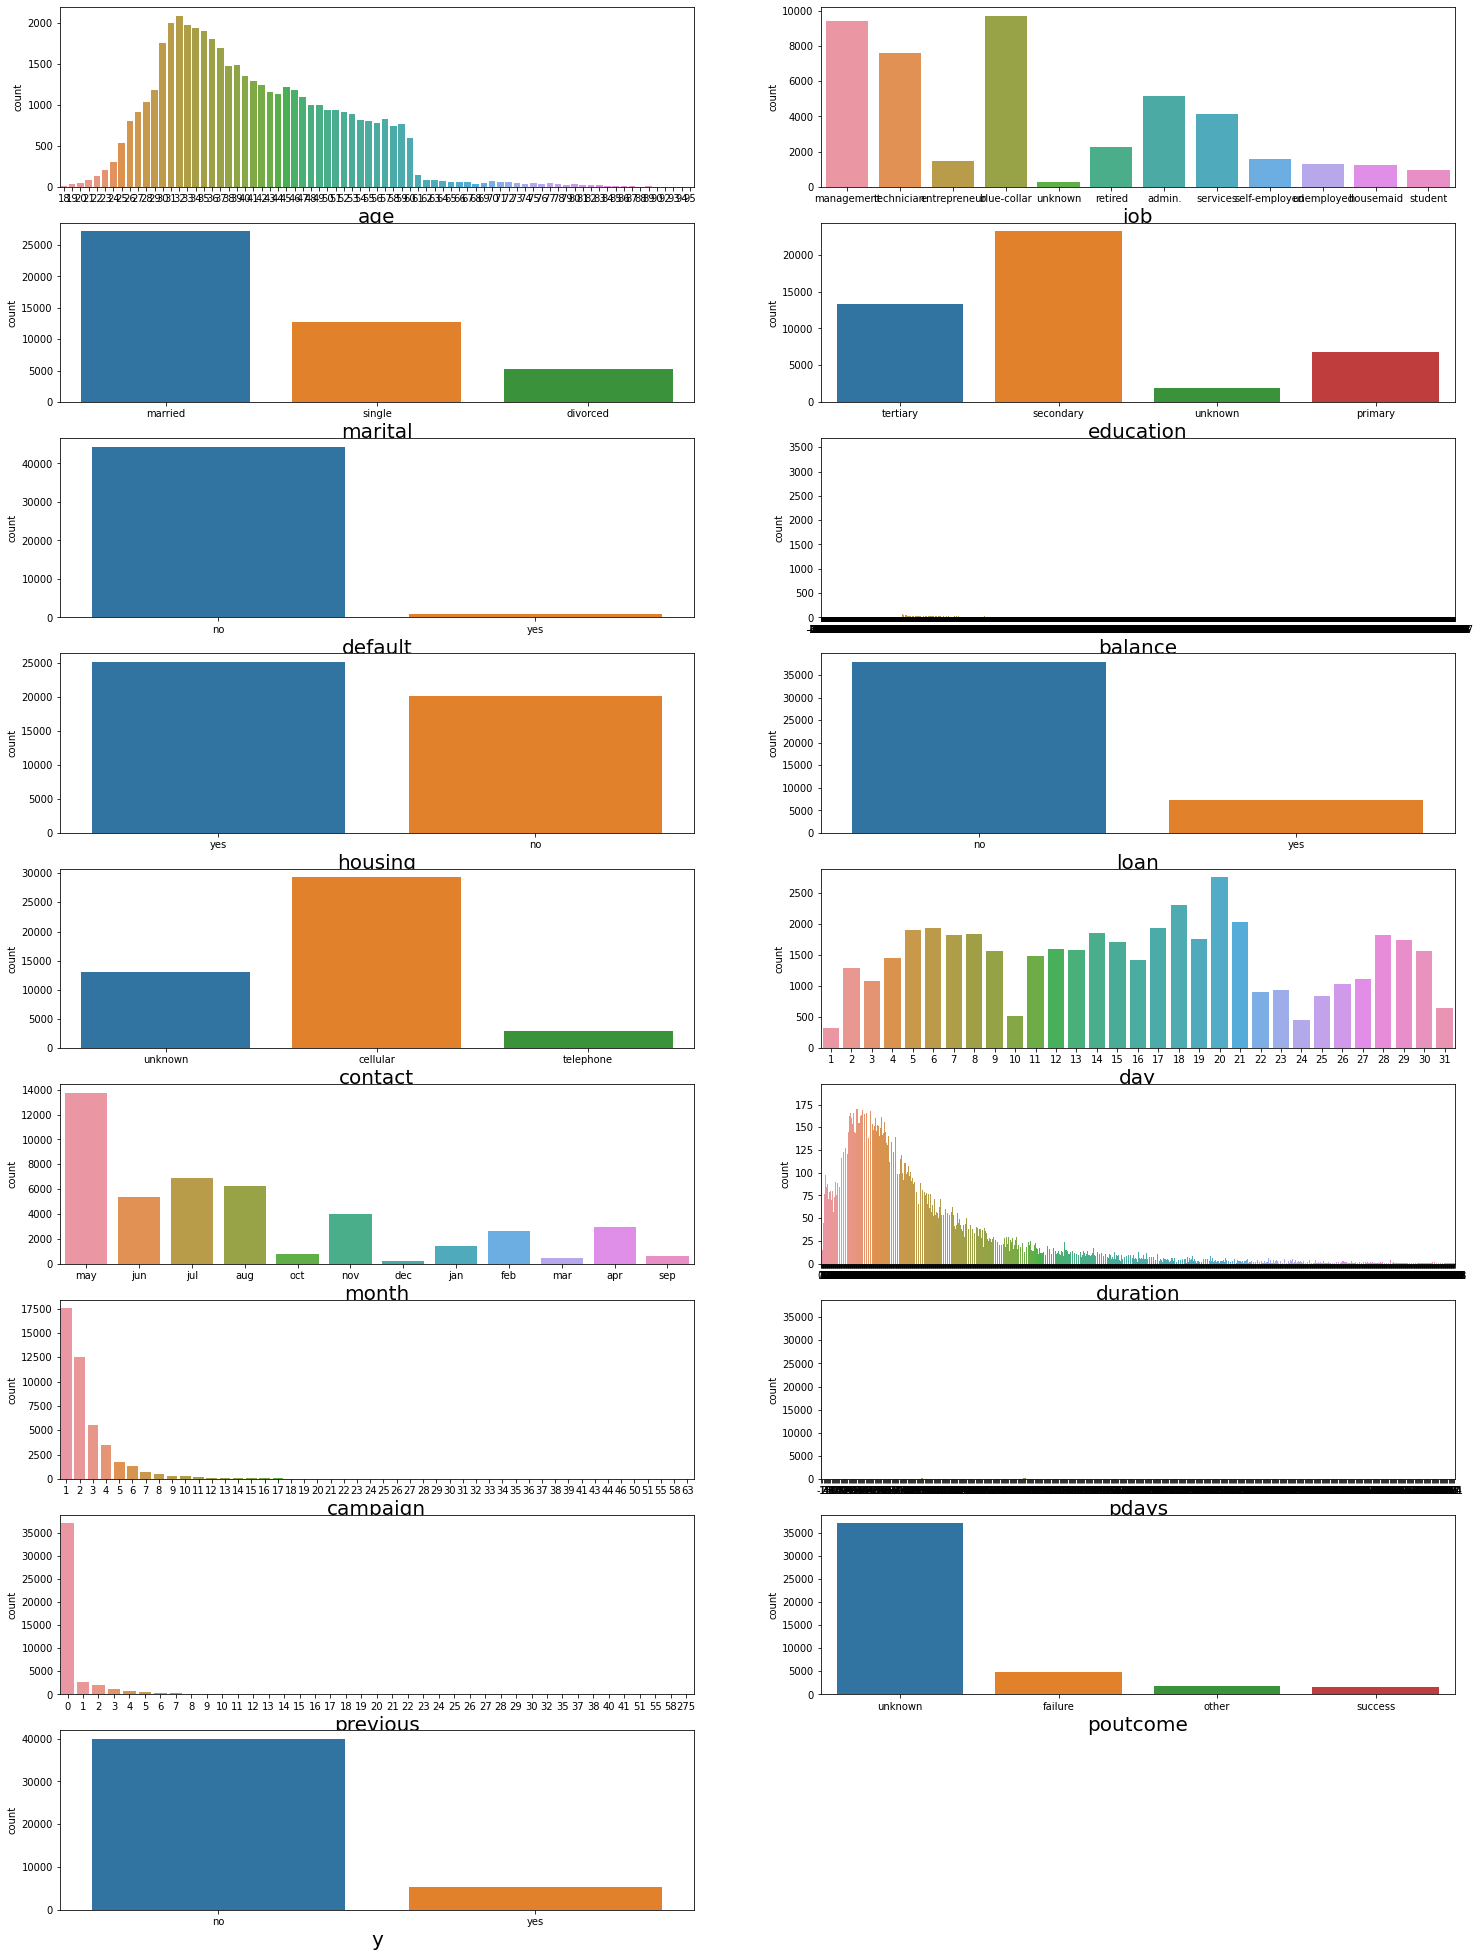

In [7]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df1 :
    if plotnumber<=18 :
        ax=plt.subplot(9,2,plotnumber)
        sns.countplot(x=df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

The bank have an extensive age range, from 18 to 95 years old.
Most of customers called is in the age of 30s and 40s.
The distribution of customer age is fairly normal with a small standard deviation.

## Bivariate Analysis

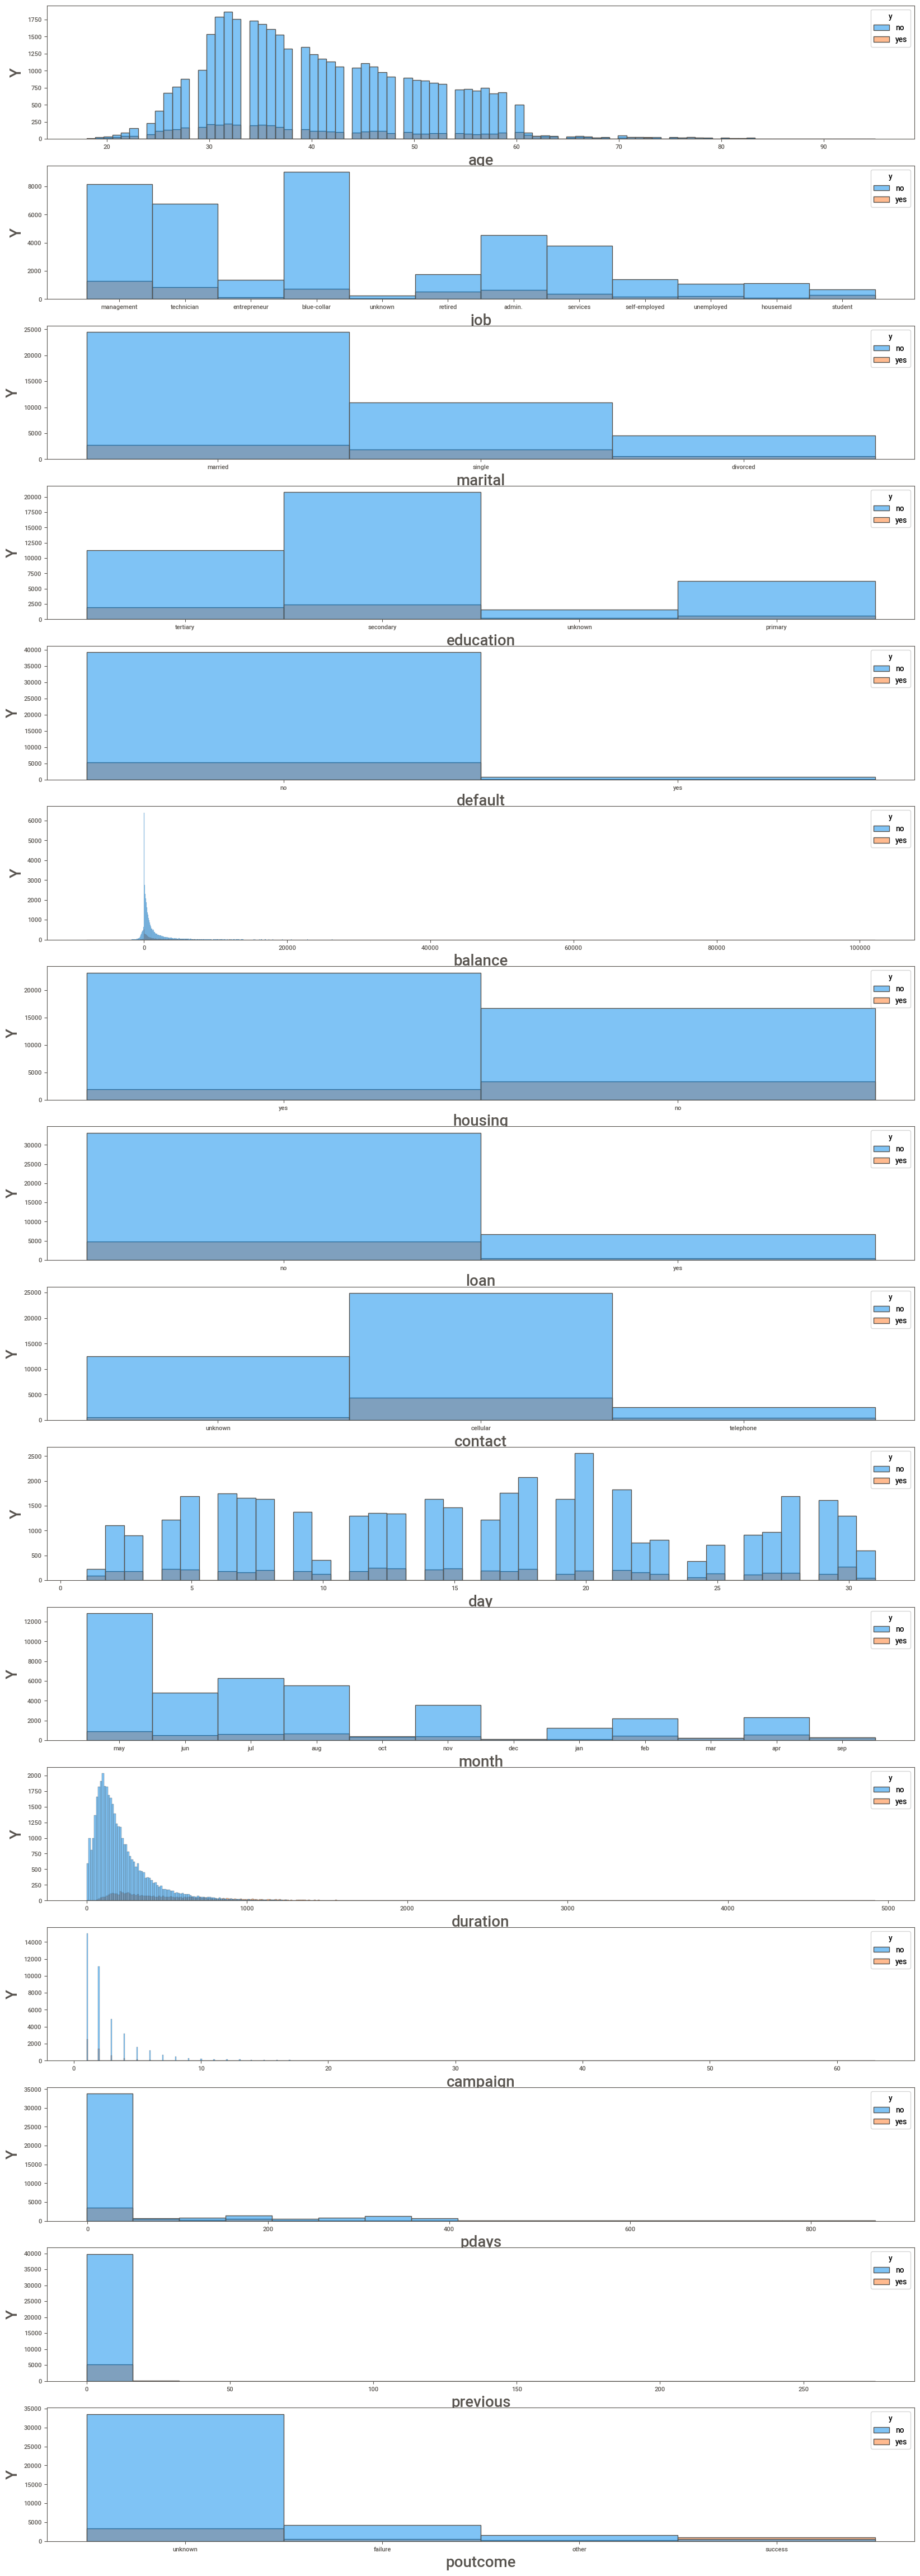

In [27]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=16 :     # as there are 9 columns in the data
        ax = plt.subplot(16,1,plotnumber)
        sns.histplot(x=df1[column],hue=df1.y)
       
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Y',fontsize=20)
    plotnumber+=1
plt.show()

#### Our observations:-

Age:-There is no clear relationship between client’s age and Target varable.

Job: The audiences of these campaigns target mostly administrators, blue-collars, and technicians.

Marital status: Most of them are married; married clients are twice as single people.

Education: Most clients have university education level while illiterate people are very less.

default/credit: Most people have no default stay on their credit file.

housing: Most people have no housing loan.

loan: Most people have no personal loan.

contact: Common means of communication are cellular.

month - May is the busy month and December is the least busy month (because of the holidays season).

day of week: Thursday is the most busy day while Friday is the least busy day of the week.



In [4]:
category_features = ['job', 'marital', 'education', 'default',  'housing','loan', 'contact',  'month',  'poutcome', 'y']

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

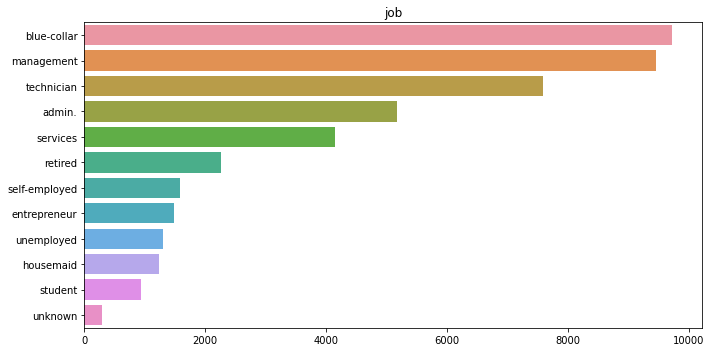

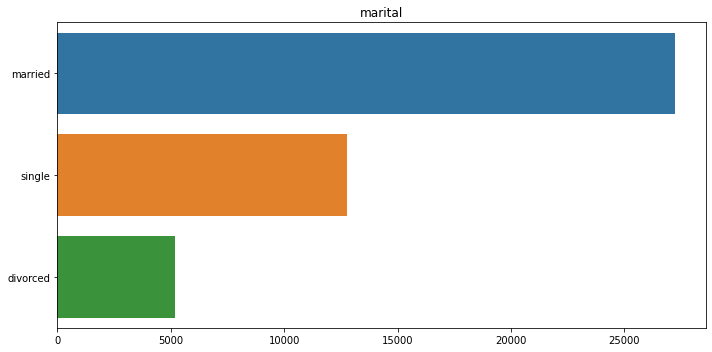

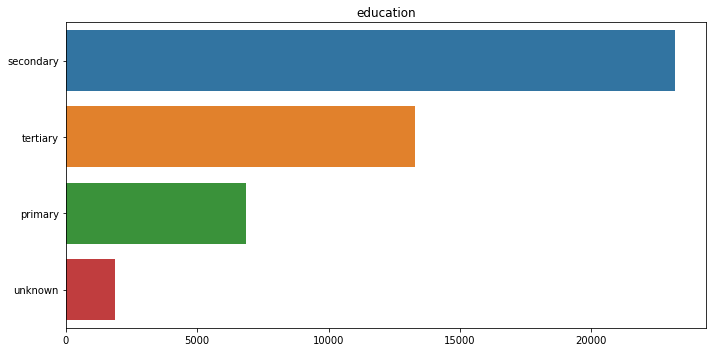

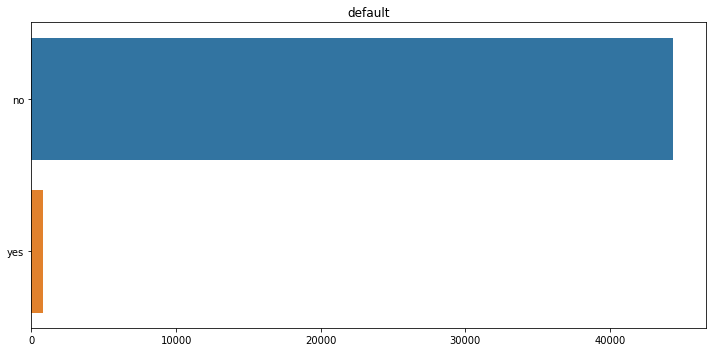

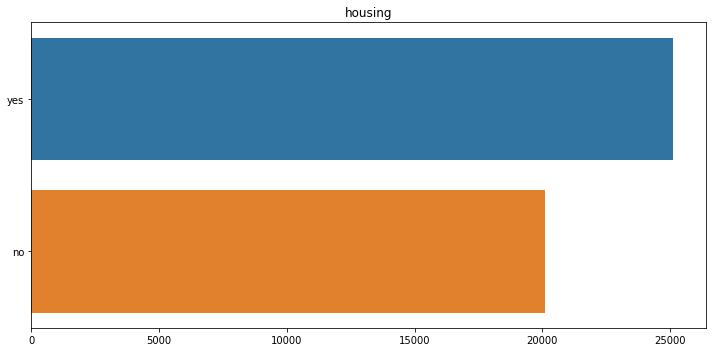

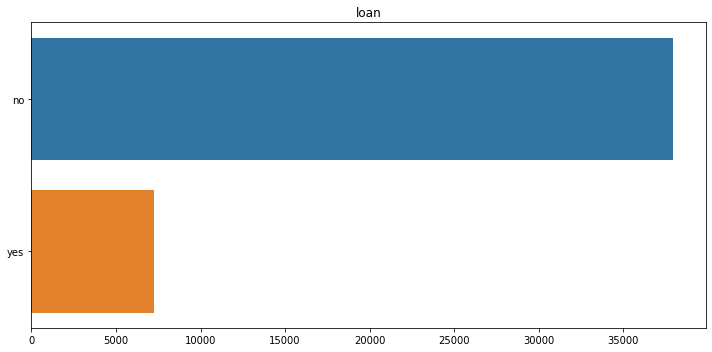

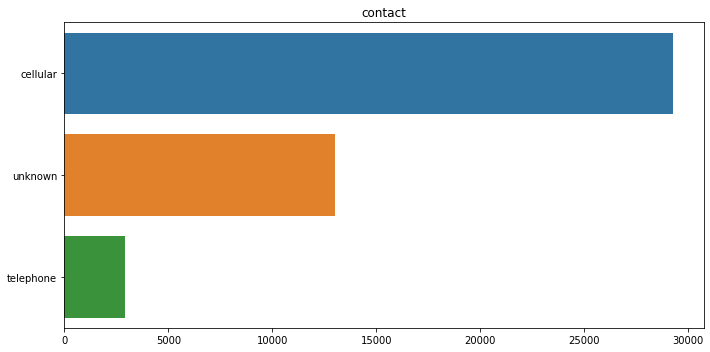

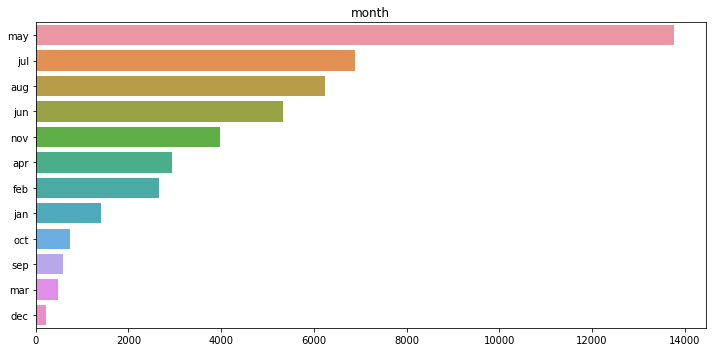

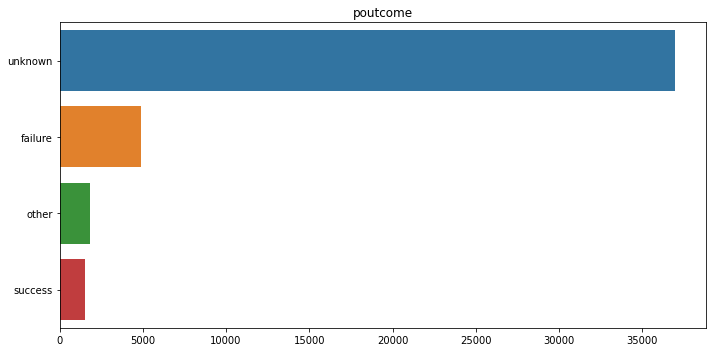

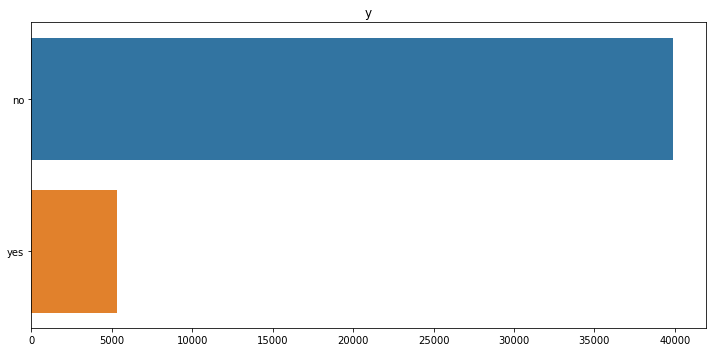

In [6]:
for col in category_features:
    plt.figure(figsize=(10,5))    
    sns.barplot(df1[col].value_counts().values, df1[col].value_counts().index, data=df1)    
    plt.title(col)    
    plt.tight_layout()

Text(0, 0.5, 'Frequency of Purchase')

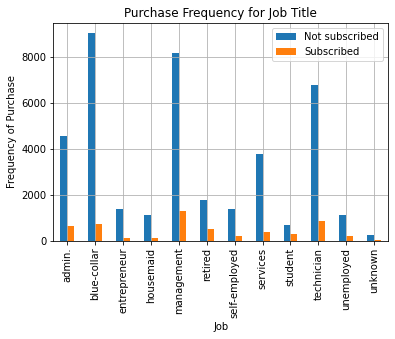

In [7]:
## Which customers were more likely to subscribe to the term deposit?
abc = pd.crosstab(df1.job, df1.y)
abc.columns = ['Not subscribed', 'Subscribed']
abc.plot(kind='bar')
plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

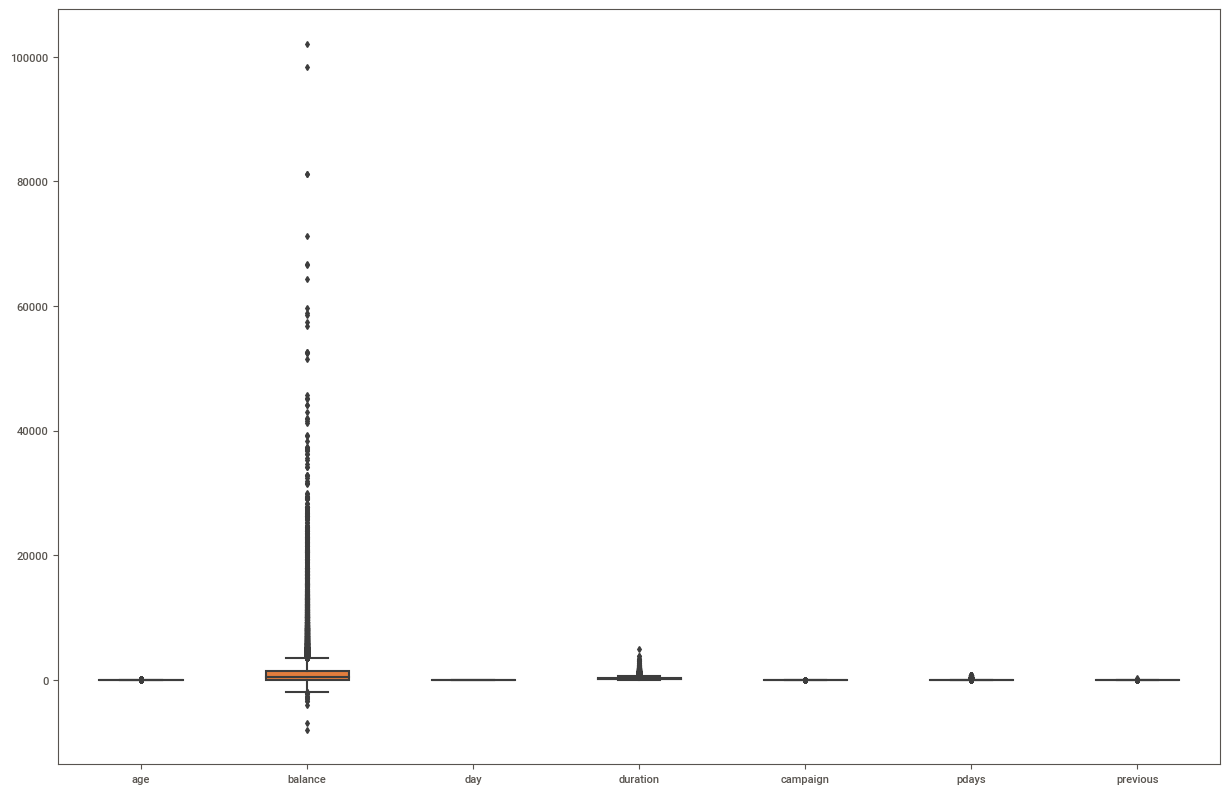

In [29]:
## chekcing the outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df1, width= 0.5,ax=ax,  fliersize=3)
plt.show()

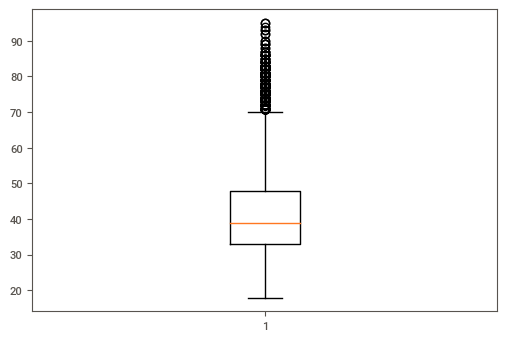

In [30]:
#checking boxplot for Age column
plt.boxplot(df1['age'])
plt.show()

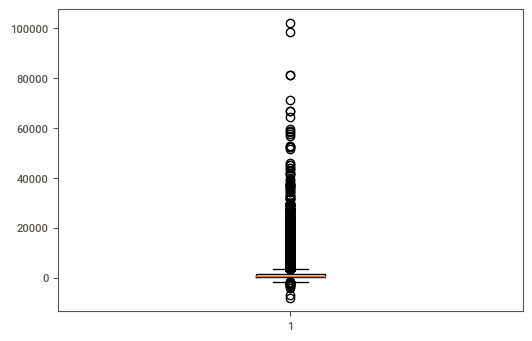

In [61]:
#checking boxplot for Balance column
plt.boxplot(df1['balance'])
plt.show()
## From the boxplot there are mainly 2 outliers

In [53]:
aa=df1[df1.balance==df1.balance.max()]

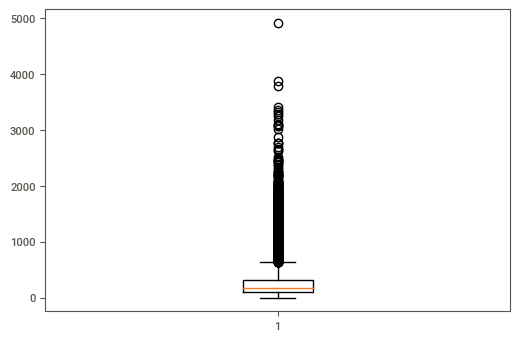

In [60]:
#checking boxplot for Duration column
plt.boxplot(df1['duration'])
plt.show()

##### From the box plot we can observed the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes ,the most calls are relatively short.  Also, there is a large number of outliers ranging from 10 minutes to 40 minutes.

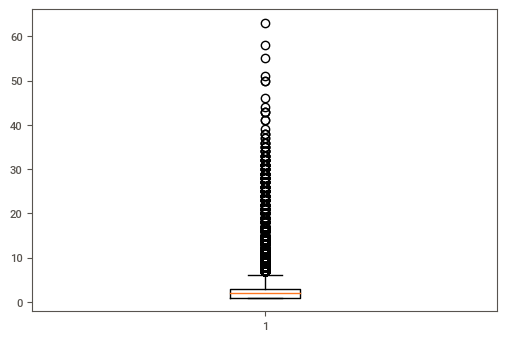

In [33]:
#checking boxplot for Campaign column
plt.boxplot(df1['campaign'])
plt.show()

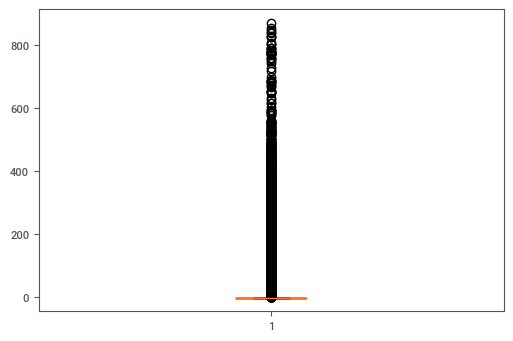

In [34]:
#checking boxplot for pdays column
plt.boxplot(df1['pdays'])
plt.show()

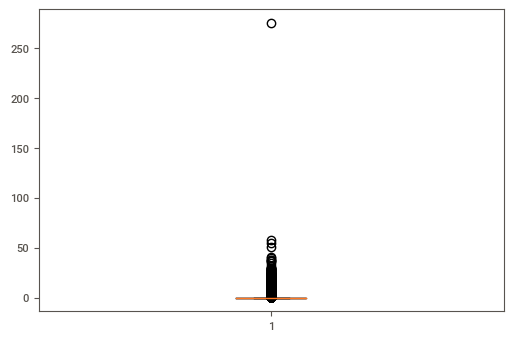

In [35]:
#checking boxplot for pdays column
plt.boxplot(df1['previous'])
plt.show()

In [9]:
bb=df1[df1.previous==df1.previous.max()]
bb

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

In [17]:
## Drop column "contact" which is useless
df1.drop('contact', axis=1)
df2.drop('contact', axis=1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,3,other,no


<AxesSubplot:>

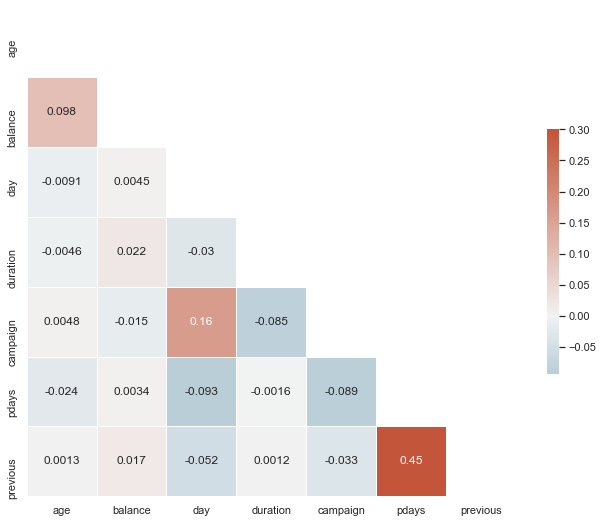

In [18]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [19]:
## creating all the catagerecal data in to list (cat_list) 
cat_list = ['job', 'marital', 'education', 'default',  'housing',
       'loan', 'contact',  'month',  'poutcome', 'y']

In [66]:
for col in cat_list:
    print(f'col: {col} unique values:')
    print(df1[col].unique())
    print()

col: job unique values:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

col: marital unique values:
['married' 'single' 'divorced']

col: education unique values:
['tertiary' 'secondary' 'unknown' 'primary']

col: default unique values:
['no' 'yes']

col: housing unique values:
['yes' 'no']

col: loan unique values:
['no' 'yes']

col: contact unique values:
['unknown' 'cellular' 'telephone']

col: month unique values:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

col: poutcome unique values:
['unknown' 'failure' 'other' 'success']

col: y unique values:
['no' 'yes']



In [73]:
## Finding the counter of all string data
print(Counter(df1.job))

print(Counter(df1.marital))

print(Counter(df1.education))

print(Counter(df1.default))

print(Counter(df1.housing))

print(Counter(df1.loan))

print(Counter(df1.contact))

print(Counter(df1.month))

print(Counter(df1.poutcome))

print(Counter(df1.y))

Counter({'blue-collar': 9732, 'management': 9458, 'technician': 7597, 'admin.': 5171, 'services': 4154, 'retired': 2264, 'self-employed': 1579, 'entrepreneur': 1487, 'unemployed': 1303, 'housemaid': 1240, 'student': 938, 'unknown': 288})
Counter({'married': 27214, 'single': 12790, 'divorced': 5207})
Counter({'secondary': 23202, 'tertiary': 13301, 'primary': 6851, 'unknown': 1857})
Counter({'no': 44396, 'yes': 815})
Counter({'yes': 25130, 'no': 20081})
Counter({'no': 37967, 'yes': 7244})
Counter({'cellular': 29285, 'unknown': 13020, 'telephone': 2906})
Counter({'may': 13766, 'jul': 6895, 'aug': 6247, 'jun': 5341, 'nov': 3970, 'apr': 2932, 'feb': 2649, 'jan': 1403, 'oct': 738, 'sep': 579, 'mar': 477, 'dec': 214})
Counter({'unknown': 36959, 'failure': 4901, 'other': 1840, 'success': 1511})
Counter({'no': 39922, 'yes': 5289})


## Converting the catagerecal data to integer for main Dataset (df1)

In [3]:
df1.job=df1.job.map({'management':11, 'blue-collar':10, 'technician':9, 'admin.':8, 'services': 7, 'retired': 6, 'self-employed':5, 'entrepreneur':4, 'unemployed': 3, 'housemaid': 2, 'student': 1, 'unknown':0 })

In [4]:
df1.marital=df1.marital.map({'married':2, 'single':1,'divorced':0})

In [5]:
df1.education=df1.education.map({'tertiary':3, 'secondary':2 ,'unknown':1 ,'primary':0})

In [6]:
df1.default=df1.default.map({'no':0, 'yes':1})

In [7]:
df1.housing=df1.housing.map({'yes':1, 'no':0})

In [8]:
df1.loan=df1.loan.map({'no':0, 'yes':1})

In [9]:
df1.contact=df1.contact.map({'unknown':2, 'cellular':1 ,'telephone':0})

In [10]:
df1.month=df1.month.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3 ,'apr':4, 'sep':9})

In [11]:
df1.poutcome=df1.poutcome.map({'unknown':3, 'failure':2, 'other':1, 'success':0})

In [12]:
df1.y=df1.y.map({'no':0 ,'yes':1})

In [30]:
## Cheaking weather the data is converted are not 
for col in cat_list:
    print(f'col: {col} unique values:')
    print(df1[col].unique())
    print()

col: job unique values:
[11  9  4 10  0  6  8  7  5  3  2  1]

col: marital unique values:
[2 1 0]

col: education unique values:
[3 2 1 0]

col: default unique values:
[0 1]

col: housing unique values:
[1 0]

col: loan unique values:
[0 1]

col: contact unique values:
[2 1 0]

col: month unique values:
[ 5  6  7  8 10 11 12  1  2  3  4  9]

col: poutcome unique values:
[3 2 1 0]

col: y unique values:
[0 1]



In [31]:
df1.info()
## Now the data is in the numerical form(int form)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


## Now converting the Sample data into numerical form

In [32]:
for col in cat_list:
    print(f'col: {col} unique values:')
    print(df2[col].unique())
    print()

col: job unique values:
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

col: marital unique values:
['married' 'single' 'divorced']

col: education unique values:
['primary' 'secondary' 'tertiary' 'unknown']

col: default unique values:
['no' 'yes']

col: housing unique values:
['no' 'yes']

col: loan unique values:
['no' 'yes']

col: contact unique values:
['cellular' 'unknown' 'telephone']

col: month unique values:
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

col: poutcome unique values:
['unknown' 'failure' 'other' 'success']

col: y unique values:
['no' 'yes']



In [13]:
df2.job=df2.job.map({'management':11, 'blue-collar':10, 'technician':9, 'admin.':8, 'services': 7, 'retired': 6, 'self-employed':5, 'entrepreneur':4, 'unemployed': 3, 'housemaid': 2, 'student': 1, 'unknown':0 })
df2.marital=df2.marital.map({'married':2, 'single':1,'divorced':0})
df2.education=df2.education.map({'tertiary':3, 'secondary':2 ,'unknown':1 ,'primary':0})
df2.default=df2.default.map({'no':0, 'yes':1})
df2.housing=df2.housing.map({'yes':1, 'no':0})
df2.loan=df2.loan.map({'no':0, 'yes':1})
df2.contact=df2.contact.map({'unknown':2, 'cellular':1 ,'telephone':0})
df2.poutcome=df2.poutcome.map({'unknown':3, 'failure':2, 'other':1, 'success':0})
df2.month=df2.month.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3 ,'apr':4, 'sep':9})
df2.y=df2.y.map({'no':0 ,'yes':1})

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [14]:
## Drop column "contact" in Main dataframe
df3=df1.drop('contact', axis=1,inplace=False)

In [15]:
df4=df2.drop('contact', axis=1,inplace=False)
## Droping the contact coulum in sample dataset

## Model Creation for Unbalance Data

In [16]:
## Defining X and y and creating dependent and independent variables
X = df3.iloc[:,:-1] ## independent variable
y = df3['y'] ## Dependent or target variable

In [108]:
X.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,11,2,3,0,2143,1,0,5,5,261,1,-1,0,3


In [17]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [123]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_hat=model.predict(X_test)

In [124]:
y_hat

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [125]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
##Training score
y_train_predict=model1.predict(X_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [126]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29972
           1       1.00      1.00      1.00      3936

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908



In [127]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1
y,,
0,29972,0
1,0,3936


In [128]:
## test acc
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.8656993718481819

In [129]:
## test score
test_f1=f1_score(y_test,y_hat)
test_f1

0.45785714285714285

In [130]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9950
           1       0.44      0.47      0.46      1353

    accuracy                           0.87     11303
   macro avg       0.69      0.70      0.69     11303
weighted avg       0.87      0.87      0.87     11303



In [131]:
pd.crosstab(y_test,y_hat)

col_0,0,1
y,,
0,9144,806
1,712,641


## Hyperparameters of DecisionTree (Model-2)

In [133]:
from sklearn.model_selection import GridSearchCV

In [135]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}
model2 = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(model2, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})


In [136]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [137]:
tree_cv.best_score_

0.5207872448179728

In [138]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=13,min_samples_leaf=1,min_samples_split=3,splitter='best')

In [139]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_split=3)

In [140]:
y_hat1=dt1.predict(X_test)

In [141]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9950
           1       0.54      0.44      0.48      1353

    accuracy                           0.89     11303
   macro avg       0.73      0.69      0.71     11303
weighted avg       0.88      0.89      0.88     11303



## RandomForest Implementation(Model-3)


In [142]:
from sklearn.ensemble import RandomForestClassifier

model3= RandomForestClassifier(n_estimators=100)
model3.fit(X_train,y_train)

RandomForestClassifier()

In [143]:
y_predict=model3.predict(X_test)

In [144]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9950
           1       0.65      0.39      0.49      1353

    accuracy                           0.90     11303
   macro avg       0.79      0.68      0.72     11303
weighted avg       0.89      0.90      0.89     11303



In [145]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.49124423963133634

## Hyperparameter Tuning(model-4)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model4= RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=model4, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

In [ ]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)
y_predict=rf_clf2.predict(X_test)
f1_score=f1_score(y_test,y_predict)

In [ ]:
f1_score

## Logistic Regreation(Model-5)

In [18]:
from sklearn.linear_model import LogisticRegression
model5= LogisticRegression()

model5.fit(X_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred =model5.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score##,f1_classification_report
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8913562770945767

In [23]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.6090750436300174

In [24]:
# Recall
Recall = recall_score(y_test,y_pred)
Recall

0.2579453067257945

In [25]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.617716371955862

In [26]:
##cross matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
y,,
0,9726,224
1,1004,349


In [28]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9950
           1       0.61      0.26      0.36      1353

    accuracy                           0.89     11303
   macro avg       0.76      0.62      0.65     11303
weighted avg       0.87      0.89      0.87     11303



In [29]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test, y_pred)

In [30]:
threshold

array([2, 1, 0], dtype=int64)

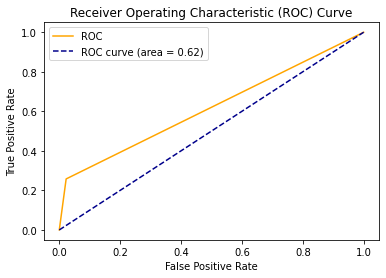

In [31]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

[0.         0.25794531 1.        ]
[0.         0.02251256 1.        ]
[2 1 0]
0.617716371955862
Threshold value is: 1


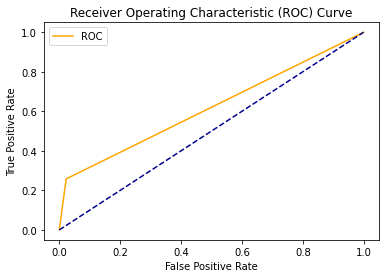

In [32]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test, y_pred))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [35]:
###checking the intercept of model equation
model5.intercept_

array([-0.11780086])

In [36]:
##Checking the coefficients of model equation
model5.coef_

array([[-7.32677025e-04, -5.75093305e-03, -2.17542071e-01,
         7.68313181e-02, -1.15244172e-02,  4.97733673e-05,
        -4.23883806e-01, -1.20308721e-01, -1.73597206e-02,
         1.66182507e-02,  4.17237387e-03, -2.76887637e-01,
        -1.08323998e-03, -3.40059882e-03, -8.66550999e-01]])

## K Neighbors Classification(Model-6)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model6=KNeighborsClassifier()
model6.fit(X_train,y_train)

y_predict=model6.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)## Confustion matrix

0.8772892152525879


col_0,0,1
y,,
0,9536,414
1,973,380


In [40]:
probs=model6.predict_proba(X_test)[:,1]

In [41]:
probs

array([0. , 0. , 0.2, ..., 0. , 0.2, 0.6])

In [42]:
def predict_threshold (model1,X_test,thresholds):
    return np.where(model1.predict_proba(X_test)[:,1]>thresholds,1,0)

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model6,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[7377 2573]
 [ 367  986]]
Threshold : 0.1
[[7377 2573]
 [ 367  986]]
Threshold : 0.2
[[8963  987]
 [ 701  652]]
Threshold : 0.30000000000000004
[[8963  987]
 [ 701  652]]
Threshold : 0.4
[[9536  414]
 [ 973  380]]
Threshold : 0.5
[[9536  414]
 [ 973  380]]
Threshold : 0.6000000000000001
[[9821  129]
 [1208  145]]
Threshold : 0.7000000000000001
[[9821  129]
 [1208  145]]
Threshold : 0.8
[[9923   27]
 [1326   27]]
Threshold : 0.9
[[9923   27]
 [1326   27]]


In [46]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [47]:
from sklearn.metrics import roc_auc_score,roc_curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.77


In [48]:
##from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

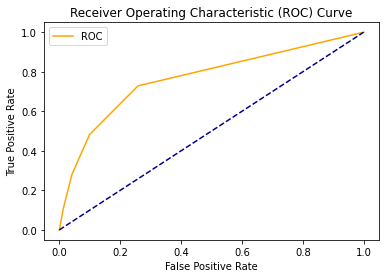

In [49]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)